### Project 1: Real Estate Price Prediction
Develop a predictive model to accurately forecast real estate prices in a given region, considering various influencing factors such as property characteristics, location, market trends, and economic indicators?

The objective of this project is to develop a robust machine learning model that can accurately predict real estate prices based on a comprehensive dataset of property features, market conditions, and economic indicators. By identifying the most significant predictors and optimizing model performance, aim to provide valuable insights for real estate professionals, investors, and policymakers.

### Install Advanced Packages

In [1]:
# Install The Advanced Packages

#!pip install catboost
#!pip install lightgbm
#!pip install xgboost

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ( 
    GammaRegressor, 
    HuberRegressor, 
    Lasso, 
    LinearRegression, 
    PassiveAggressiveRegressor, 
    PoissonRegressor, 
    QuantileRegressor, 
    Ridge, 
    SGDRegressor, 
    RANSACRegressor, 
    SGDRegressor, 
    TheilSenRegressor, 
    TweedieRegressor
)
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import (
    RobustScaler, 
    StandardScaler, 
    LabelEncoder, 
    OneHotEncoder,
    QuantileTransformer
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor
)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
import math
from scipy.stats import chi2_contingency, mannwhitneyu



# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options to view all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

### Data Collection

In [3]:
# Load the data

real_estate_data = pd.read_csv('Real_Estate_Data.csv')

# The first five rows
real_estate_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Exploration

In [4]:
# Check for the info of the data 
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Check for the shape of the data
real_estate_data.shape

(545, 13)

In [6]:
# Check for the summary of numerical data
real_estate_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Check for missing values
real_estate_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Check for number of unique values per column
real_estate_data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [9]:
# Get all the unique values in columns in the data set except for price and area columns
columns = real_estate_data.columns

# Check for unique values per column
print(f"The unique values in {columns[2]} are: {real_estate_data[columns[2]].unique()}")
print(f"The unique values in {columns[3]} are: {real_estate_data[columns[3]].unique()}")
print(f"The unique values in {columns[4]} are: {real_estate_data[columns[4]].unique()}")
print(f"The unique values in {columns[5]} are: {real_estate_data[columns[5]].unique()}")
print(f"The unique values in {columns[6]} are: {real_estate_data[columns[6]].unique()}")
print(f"The unique values in {columns[7]} are: {real_estate_data[columns[7]].unique()}")
print(f"The unique values in {columns[8]} are: {real_estate_data[columns[8]].unique()}")
print(f"The unique values in {columns[9]} are: {real_estate_data[columns[9]].unique()}")
print(f"The unique values in {columns[10]} are: {real_estate_data[columns[10]].unique()}")
print(f"The unique values in {columns[11]} are: {real_estate_data[columns[11]].unique()}")
print(f"The unique values in {columns[12]} are: {real_estate_data[columns[12]].unique()}")

The unique values in bedrooms are: [4 3 5 2 6 1]
The unique values in bathrooms are: [2 4 1 3]
The unique values in stories are: [3 4 2 1]
The unique values in mainroad are: ['yes' 'no']
The unique values in guestroom are: ['no' 'yes']
The unique values in basement are: ['no' 'yes']
The unique values in hotwaterheating are: ['no' 'yes']
The unique values in airconditioning are: ['yes' 'no']
The unique values in parking are: [2 3 0 1]
The unique values in prefarea are: ['yes' 'no']
The unique values in furnishingstatus are: ['furnished' 'semi-furnished' 'unfurnished']


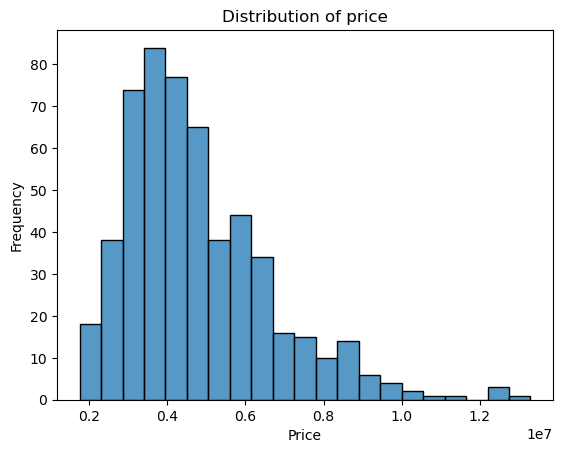

In [10]:
# Price Distribution Column
ax = sns.histplot(
    data = real_estate_data,
    x = 'price',
    palette = 'pastel'
)
#ax.set_xscale('log')
plt.title("Distribution of price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

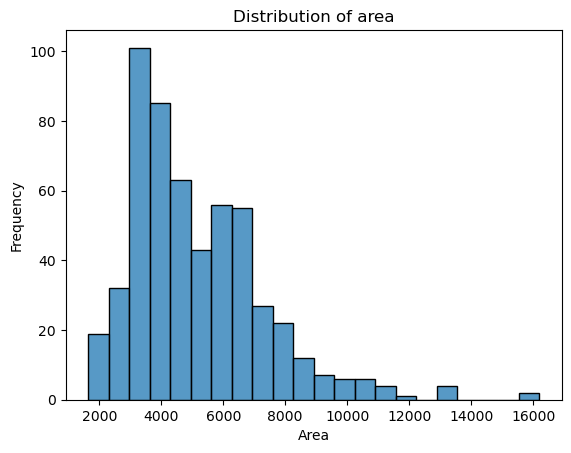

In [11]:
# Area Distribution Column
ax = sns.histplot(
    data = real_estate_data,
    x = 'area',
    palette = 'pastel'
)
#ax.set_xscale('log')
plt.title("Distribution of area")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()

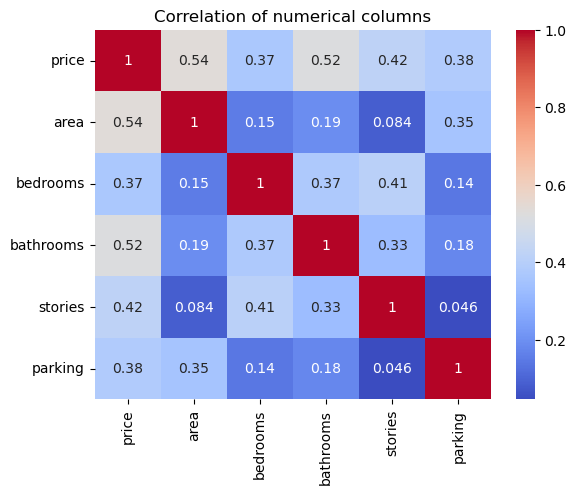

In [12]:
# Check for the correlation of columns

correlation = real_estate_data.select_dtypes(exclude = 'object').corr()

# Heat map show the visual correlation
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title("Correlation of numerical columns")
plt.show()

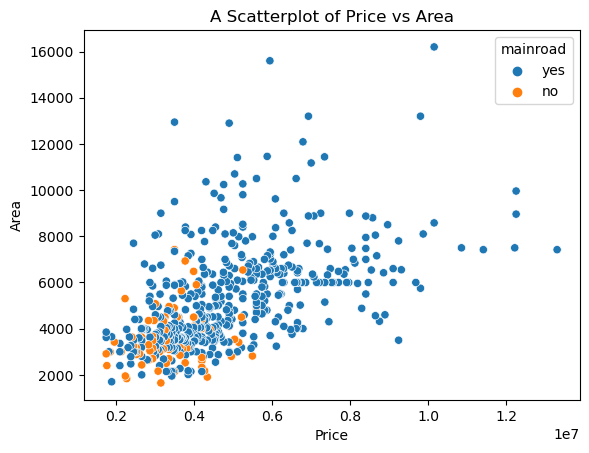

In [13]:
# Scatterplot showing the relationship betwen price and  area

sns.scatterplot(
    data = real_estate_data,
    x = 'price',
    y = 'area',
    hue = 'mainroad'
)
plt.title("A Scatterplot of Price vs Area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

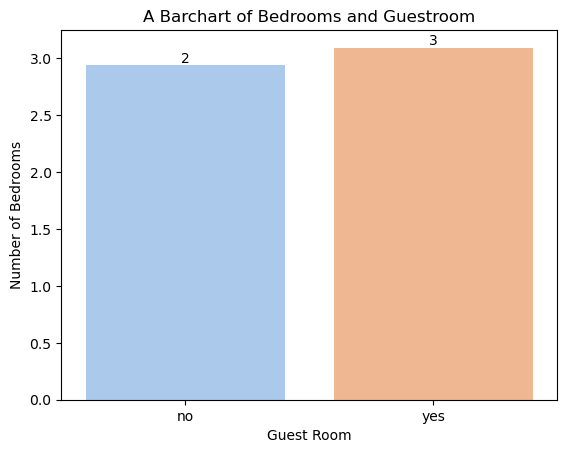

In [14]:
# Barplot of bedrooms and guestroom

ax = sns.barplot(
    data = real_estate_data,
    x = 'guestroom',
    y = 'bedrooms',
    errorbar = None,
    palette = 'pastel'
)

# Annoate bars with count values
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha = 'center',
        va = 'bottom'
    )
plt.title('A Barchart of Bedrooms and Guestroom')
plt.xlabel("Guest Room")
plt.ylabel("Number of Bedrooms")
plt.show()

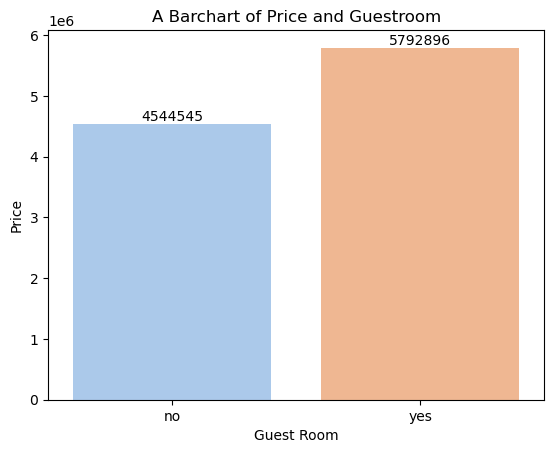

In [15]:
# Barplot of price and guestroom

ax = sns.barplot(
    data = real_estate_data,
    x = 'guestroom',
    y = 'price',
    errorbar = None,
    palette = 'pastel'
)

# Annotate bars with the count values
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha = 'center',
        va = 'bottom'
    )

plt.title('A Barchart of Price and Guestroom')
plt.xlabel("Guest Room")
plt.ylabel("Price")
plt.show()

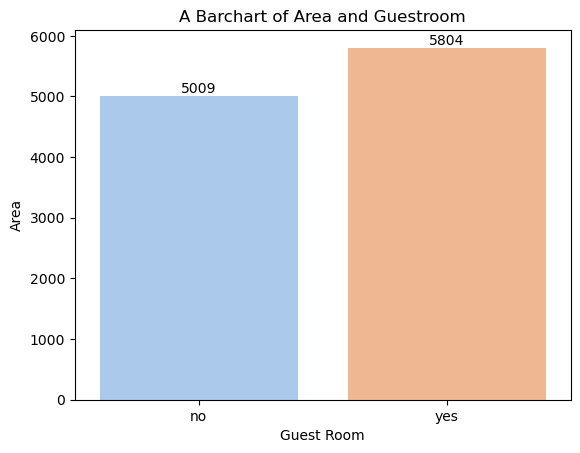

In [16]:
# Barplot of area and guestroom

ax = sns.barplot(
    data = real_estate_data,
    x = 'guestroom',
    y = 'area',
    errorbar = None,
    palette = 'pastel'
)

# Annotate bars with the count values
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha = 'center',
        va = 'bottom'
    )

plt.title('A Barchart of Area and Guestroom')
plt.xlabel("Guest Room")
plt.ylabel("Area")
plt.show()

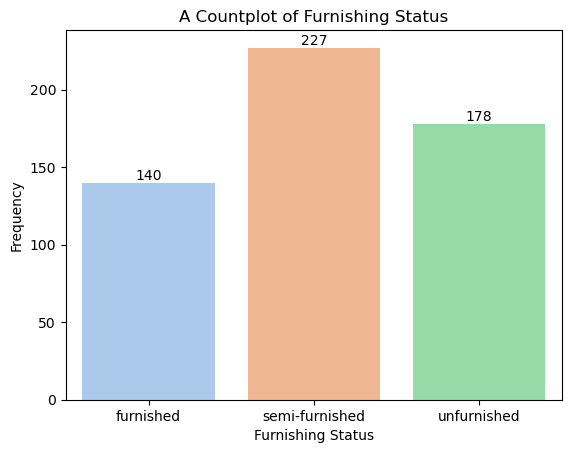

In [17]:
# Countplot of furnishingstatus

ax = sns.countplot(
    data = real_estate_data,
    x = 'furnishingstatus',
    palette = 'pastel'
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha='center', 
                va='bottom'
    )
    
plt.title('A Countplot of Furnishing Status')
plt.xlabel("Furnishing Status")
plt.ylabel("Frequency")
plt.show()

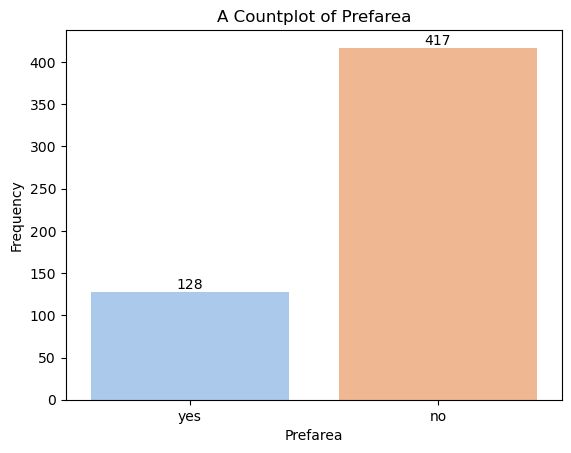

In [18]:
# Countplot of prefarea

ax = sns.countplot(
    data = real_estate_data,
    x = 'prefarea',
    palette = 'pastel'
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha='center', 
                va='bottom'
    )
    
plt.title('A Countplot of Prefarea')
plt.xlabel("Prefarea")
plt.ylabel("Frequency")
plt.show()

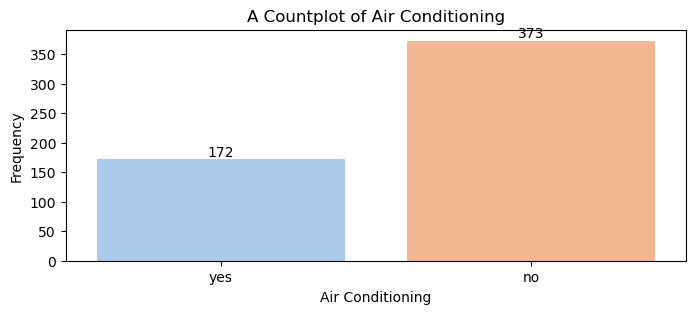

In [19]:
# Countplot of airconditioning

plt.figure(figsize = (8, 3))
ax = sns.countplot(
    data = real_estate_data,
    x = 'airconditioning',
    palette = 'pastel'
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha='center', 
                va='bottom'
    )
    
plt.title('A Countplot of Air Conditioning')
plt.xlabel("Air Conditioning")
plt.ylabel("Frequency")
plt.show()

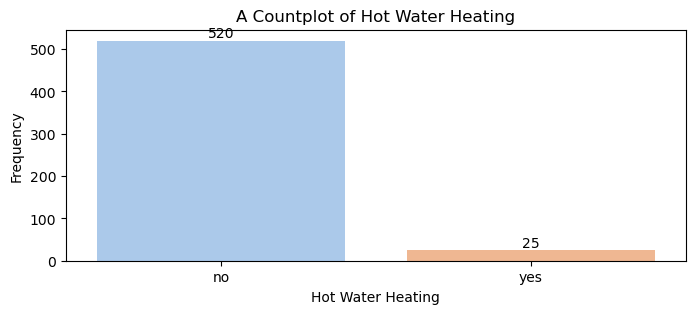

In [20]:
# Countplot of hotwaterheating

plt.figure(figsize = (8, 3))
ax = sns.countplot(
    data = real_estate_data,
    x = 'hotwaterheating',
    palette = 'pastel'
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha='center', 
                va='bottom'
    )
    
plt.title('A Countplot of Hot Water Heating')
plt.xlabel("Hot Water Heating")
plt.ylabel("Frequency")
plt.show()

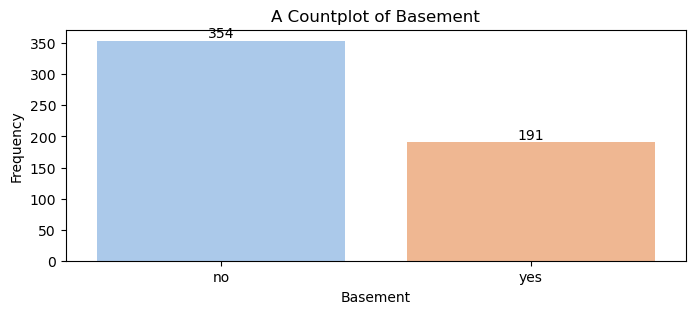

In [21]:
# Countplot of basement

plt.figure(figsize = (8, 3))
ax = sns.countplot(
    data = real_estate_data,
    x = 'basement',
    palette = 'pastel'
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha='center', 
                va='bottom'
    )
    
plt.title('A Countplot of Basement')
plt.xlabel("Basement")
plt.ylabel("Frequency")
plt.show()

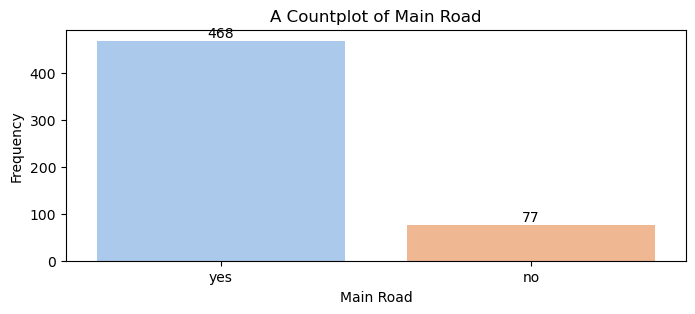

In [22]:
# Countplot of basement

plt.figure(figsize = (8, 3))
ax = sns.countplot(
    data = real_estate_data,
    x = 'mainroad',
    palette = 'pastel'
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha='center', 
                va='bottom'
    )
    
plt.title('A Countplot of Main Road')
plt.xlabel("Main Road")
plt.ylabel("Frequency")
#plt.legend()
plt.show()

### Data Preparation

In [23]:
# Split data into target and feature variables

y = real_estate_data['price']

X = real_estate_data.drop(columns = 'price', axis = 1)

# Split the data into test set and train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Check the shapes of the data sets
print(f"The shape of X train is: {X_train.shape}")
print(f"The shape of y train is: {y_train.shape}")
print(f"The shape of X test is: {X_test.shape}")
print(f"The shape of y test is: {y_test.shape}")
print('\n')

# Check for the columns in x train and y train
print(f"The columns of X train are: {X_train.columns}")
print('\n')
print(f"The columns of X test are: {X_test.columns}")
print('\n')

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include = ['object']).columns
numerical_cols = X.select_dtypes(exclude = ['object']).columns

#Check the numerical and categorical variables created
print("Categorical columns", categorical_cols)
print('\n')
print("Numerical columns", numerical_cols)
print('\n')

# Create a ColumnTransformer to handle categorical and numerical features differently
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', make_pipeline(
            RobustScaler(), QuantileTransformer(output_distribution = 'normal')),
         numerical_cols
        ),
        ('categorical', make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse_output=False)), categorical_cols)
    ]
)

preprocessor

The shape of X train is: (436, 12)
The shape of y train is: (436,)
The shape of X test is: (109, 12)
The shape of y test is: (109,)


The columns of X train are: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


The columns of X test are: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


Categorical columns Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


Numerical columns Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')




ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler()),
                                                 ('quantiletransformer',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])

In [24]:
# Define Regression Models
models = {
    "linear_regression": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "random_forest_regressor": RandomForestRegressor(),
    "decision_tree_regressor": DecisionTreeRegressor(),
    "XGBRF_regressor": XGBRFRegressor(verbosity = 0),
    "cat_boost_regressor": CatBoostRegressor(verbose = 0),
    "LGBM_regressor": LGBMRegressor(verbosity = -1),
    "ada_boost_regressor": AdaBoostRegressor(),
    "k_neighbors_regressor": KNeighborsRegressor(),
    "extra_trees_regressor": ExtraTreesRegressor(),
    "hist_gradient_boosting_regressor": HistGradientBoostingRegressor(),
    "gradient_boosting_regressor": GradientBoostingRegressor(),
    "gamma_regressor": GammaRegressor(), 
    "huber_regressor": HuberRegressor(),  
    "passive_aggressive_regressor": PassiveAggressiveRegressor(), 
    "poisson_regressor": PoissonRegressor(), 
    "quantile_regressor": QuantileRegressor(), 
    "SGD_regressor": SGDRegressor(), 
    "RANSAC_regressor": RANSACRegressor(), 
    "theil_sen_regressor": TheilSenRegressor(), 
    "tweedie_regressor": TweedieRegressor()
}

In [25]:
# Preprocess the data

X_train_preprocessed_estate = preprocessor.fit_transform(X_train)
X_test_preprocessed_estate = preprocessor.transform(X_test)

In [26]:
# Dictionary to store the evaluation results
model_performance_estate = {}

# Loop through the models dictionary
for model_name, model_regressor in models.items():
    
    # Fit the train data set in the model
    model_regressor.fit(X_train_preprocessed_estate, y_train)
    
    # Make predictions on the test set
    y_pred_estate = model_regressor.predict(X_test_preprocessed_estate)
    
    # Evaluate the model using regression metrics
    mae = round(mean_absolute_error(y_test, y_pred_estate), 2)
    mse = round(mean_squared_error(y_test, y_pred_estate), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_test, y_pred_estate), 2)
    
    # Store the evaluation results in the dictionary
    model_performance_estate[model_name] = {
        "MAE_estate": mae,
        "MSE_estate": mse,
        "RMSE_estate": rmse,
        "R2_estate": r2,
        "Predictions_estate": y_pred_estate
    }

# Display the in a dataframe
eval_report = pd.DataFrame(model_performance_estate).transpose()

# Sort the results by r2_score
eval_report_df = eval_report.sort_values(by = "R2_estate", ascending = False)

# Display the dataframe
eval_report_df

,MAE_estate,MSE_estate,RMSE_estate,R2_estate,Predictions_estate
poisson_regressor,956270.75,1684044642752.639893,1297707.46,0.67,"[5049891.242341301, 7253648.385368067, 3340791..."
gradient_boosting_regressor,971317.67,1719428687266.320068,1311269.88,0.66,"[4502828.371815741, 7301497.919567916, 3697701..."
linear_regression,983963.4,1834378585058.070068,1354392.33,0.64,"[5525975.71818671, 7213672.02195933, 3167198.0..."
ridge,984222.62,1836288239674.810059,1355097.13,0.64,"[5532437.045778992, 7205844.498416931, 3168676..."
lasso,983964.84,1834382742510.879883,1354393.87,0.64,"[5525990.289928151, 7213667.964466752, 3167198..."
SGD_regressor,992489.58,1841520549627.0,1357026.36,0.64,"[5528718.332206751, 7142806.122776798, 3228880..."
cat_boost_regressor,975026.92,1809151818543.449951,1345047.14,0.64,"[5210741.873841026, 7416318.88878382, 3585494...."
hist_gradient_boosting_regressor,1032009.15,1907870298680.629883,1381256.78,0.62,"[5030195.792415236, 7135486.60027845, 3532249...."
LGBM_regressor,1022791.05,1926431894616.27002,1387959.62,0.62,"[4702272.131055986, 7026086.7661921615, 359540..."
random_forest_regressor,1034196.58,1963429747701.949951,1401224.37,0.61,"[5599020.0, 7326340.0, 3764600.0, 4441570.0, 3..."


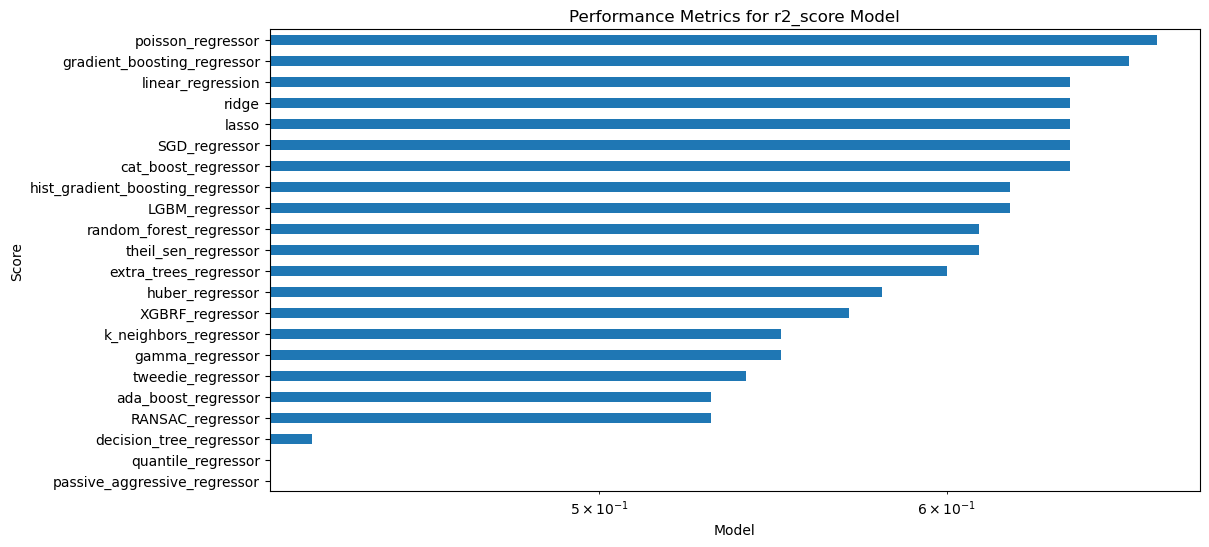

In [27]:
# Create a visualization for the r2_score
eval_report_df['R2_estate'].sort_values(ascending = True).plot(
    kind = 'barh', figsize = (12,6))
plt.title('Performance Metrics for r2_score Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xscale('log')
plt.show()

## Project 2: Send Automatic Emails and Password Authentication using Python

### 2.1 Send Automatic Emails using Python

### Content

Every time you register on a new app, you automatically receive a welcome message with your name on it. If you want to learn how to send such emails automatically, then this article is for you. You will automatically send a welcome message to the newly registered user. For this task, you must first generate a google app password for your Gmail account. Once you’ve generated your Google app password, you can start the task of sending emails using Python by writing the logic for code.

### Expectations
i. Import the necessary libraries

ii. Create a function then inside the function perform all operations necessary e.g. (prompting user to enter email and name, think of SMTP and how it is used, etc). Also draft the exact message that you want to send.

iii. Lastly call your function. The function call should return a message like “your email has been sent to ‘name’

In [28]:
# Step 1: Import necessary libraries
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Step 2: Create a function to send the email
def send_welcome_email():
    # Prompt user for their name and email
    user_name = input("Enter the name of the user: ")
    user_email = input("Enter the email of the user: ")

    # Draft the email message
    subject = "Welcome to Our Service!"
    body = f"Hello {user_name},\n\nWelcome to our service! We're excited to have you on board."
    
    # Sender's email (your Gmail)
    sender_email = "muragetiras@gmail.com"
    sender_password = "xxrd jrnu tnrr fygv"  # Google app password

    # Step 3: Setup the MIME
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = user_email
    message["Subject"] = subject
    message.attach(MIMEText(body, "plain"))

    # Step 4: Connect to Gmail's SMTP server
    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()  # Upgrade the connection to a secure encrypted SSL/TLS connection
        server.login(sender_email, sender_password)
        
        # Send the email
        server.sendmail(sender_email, user_email, message.as_string())
        print(f"Your email has been sent to {user_name}.")
    except Exception as e:
        print(f"Failed to send email: {str(e)}")
    finally:
        server.quit()  # Close the connection

# Call the function
send_welcome_email()

Enter the name of the user: Tiras
Enter the email of the user: muragetiras@gmail.com
Your email has been sent to Tiras.


## 2.2 Password Authentication using Python
### Content:
Password Authentication is the process of checking the identity of a user. Almost every online platform today makes sure that they only give access to the real user which can be only possible by asking for a password while a user wants to log in to the account To create a password authentication system using Python you have to follow the
steps mentioned below:
    
i. Create a dictionary of usernames with their passwords.

ii. Then you have to ask for user input as the username by using the input function in Python.

iii. Then you have to use the getpass module in Python to ask for user input as the password. Here we are using the getpass module instead of the input function to make sure that the user doesn’t get to see what he/she write in the password field.
### Expected output

In [29]:
# Step 1: Import necessary libraries
import getpass

# Step 2: Create a dictionary of usernames and passwords
user_data = {
    "Tiras": "123",
    "John": "pass_123",
    "admin_user": "passAdmin",
}

# Step 3: Create a function for authentication
def authenticate_user():
    # Ask for username and password
    username = input("Enter your username: ")
    
    # Use getpass to hide password input
    password = getpass.getpass("Enter your password: ")

    # Step 4: Validate the username and password
    if username in user_data and user_data[username] == password:
        print("Authentication successful! Welcome,", username)
    else:
        print("Authentication failed! Invalid username or password.")

# Call the function
authenticate_user()

Enter your username: Tiras
Enter your password: ········
Authentication successful! Welcome, Tiras


## Project 3: Electricity Price Prediction ML model
The price of electricity depends on many factors. Predicting the price of electricity helps many businesses understand how much electricity they have to pay each year. The Electricity Price Prediction task is based on a case study where you need to predict the daily price of electricity based on the daily consumption of heavy machinery used by businesses.

### Part 1: 
For this project you will build a Machine learning model, but be sure to follow all the necessary steps from data analysis, data exploration up to testing the model accuracy.

### Data Collection

In [30]:
# Load the data
electricity_data = pd.read_csv('electricity.csv')

# Check the first five rows of the dataframe
electricity_data.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


### Data Exploration

In [31]:
# Check for the info of the data 
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [32]:
# Check for the shape of the data
electricity_data.shape

(38014, 18)

In [33]:
# Check for the summary of numerical data
electricity_data.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [34]:
# Check for missing values
electricity_data.isna().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [35]:
# Check for number of unique values per column
electricity_data.nunique()

DateTime                  38014
Holiday                      15
HolidayFlag                   2
DayOfWeek                     7
WeekOfYear                   52
Day                          31
Month                        12
Year                          3
PeriodOfDay                  48
ForecastWindProduction    29312
SystemLoadEA              36166
SMPEA                      8661
ORKTemperature               32
ORKWindspeed                 53
CO2Intensity              25115
ActualWindProduction       2940
SystemLoadEP2             36171
SMPEP2                     9277
dtype: int64

In [36]:
# Get all the unique values in all the columns
columns = electricity_data.columns

# Check for unique values per column
print(f"The unique values in {columns[0]} are: {electricity_data[columns[0]].unique()}")
print('\n')
print(f"The unique values in {columns[1]} are: {electricity_data[columns[1]].unique()}")
print('\n')
print(f"The unique values in {columns[2]} are: {electricity_data[columns[2]].unique()}")
print('\n')
print(f"The unique values in {columns[3]} are: {electricity_data[columns[3]].unique()}")
print('\n')
print(f"The unique values in {columns[4]} are: {electricity_data[columns[4]].unique()}")
print('\n')
print(f"The unique values in {columns[5]} are: {electricity_data[columns[5]].unique()}")
print('\n')
print(f"The unique values in {columns[6]} are: {electricity_data[columns[6]].unique()}")
print('\n')
print(f"The unique values in {columns[7]} are: {electricity_data[columns[7]].unique()}")
print('\n')
print(f"The unique values in {columns[8]} are: {electricity_data[columns[8]].unique()}")
print('\n')
print(f"The unique values in {columns[9]} are: {electricity_data[columns[9]].unique()}")
print('\n')
print(f"The unique values in {columns[10]} are: {electricity_data[columns[10]].unique()}")
print('\n')
print(f"The unique values in {columns[11]} are: {electricity_data[columns[11]].unique()}")
print('\n')
print(f"The unique values in {columns[12]} are: {electricity_data[columns[12]].unique()}")
print('\n')
print(f"The unique values in {columns[13]} are: {electricity_data[columns[13]].unique()}")
print('\n')
print(f"The unique values in {columns[14]} are: {electricity_data[columns[14]].unique()}")
print('\n')
print(f"The unique values in {columns[15]} are: {electricity_data[columns[15]].unique()}")
print('\n')
print(f"The unique values in {columns[16]} are: {electricity_data[columns[16]].unique()}")
print('\n')
print(f"The unique values in {columns[17]} are: {electricity_data[columns[17]].unique()}")

The unique values in DateTime are: ['01/11/2011 00:00' '01/11/2011 00:30' '01/11/2011 01:00' ...
 '31/12/2013 22:30' '31/12/2013 23:00' '31/12/2013 23:30']


The unique values in Holiday are: ['None' 'Christmas Eve' 'Christmas' "St Stephen's Day" "New Year's Eve"
 "New Year's Day" "St Patrick's Day" 'Good Friday' 'Holy Saturday'
 'Easter' 'Easter Monday' 'May Day' 'June Bank Holiday'
 'August Bank Holiday' 'October Bank Holiday']


The unique values in HolidayFlag are: [0 1]


The unique values in DayOfWeek are: [1 2 3 4 5 6 0]


The unique values in WeekOfYear are: [44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43]


The unique values in Day are: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


The unique values in Month are: [11 12  1  2  3  4  5  6  7  8  9 10]


The unique values in Year are: [2011 2012 2013]


The unique valu

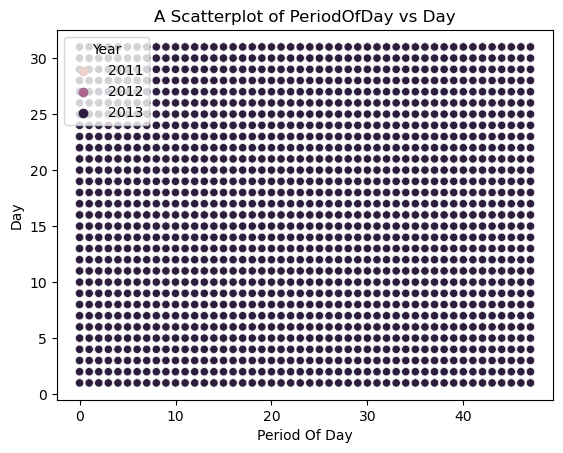

In [37]:
# Scatterplot showing the relationship betwen PeriodOfDay and  Day

sns.scatterplot(
    data = electricity_data,
    x = 'PeriodOfDay',
    y = 'Day',
    hue = 'Year'
)
plt.title("A Scatterplot of PeriodOfDay vs Day")
plt.xlabel("Period Of Day")
plt.ylabel("Day")
plt.show()

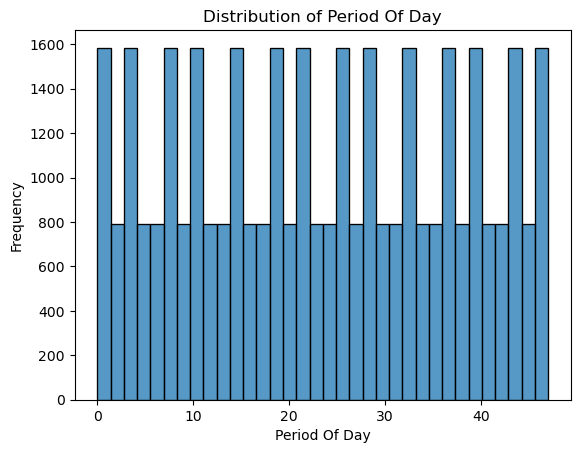

In [38]:
# PeriodOfDay Distribution Column
ax = sns.histplot(
    data = electricity_data,
    x = 'PeriodOfDay',
    palette = 'pastel'
)
#ax.set_xscale('log')
plt.title("Distribution of Period Of Day")
plt.xlabel("Period Of Day")
plt.ylabel("Frequency")
plt.show()

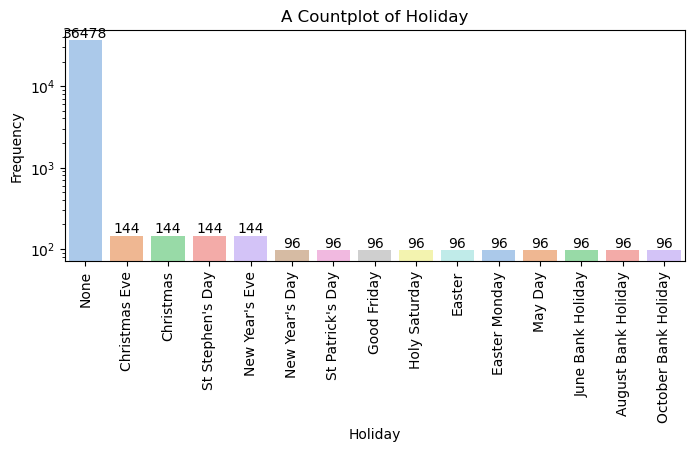

In [39]:
# Countplot of Holiday

plt.figure(figsize = (8, 3))
ax = sns.countplot(
    data = electricity_data,
    x = 'Holiday',
    palette = 'pastel'
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'bottom'
    )
    
plt.title('A Countplot of Holiday')
plt.xlabel("Holiday")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

### Data Cleaning

In [40]:
# Data cleaning for each column

# 1. DataTime column - Covert column into datetime stamp
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'], infer_datetime_format=True)

# 2. Holiday - Replace the value 'None' with the most frequent
electricity_data['Holiday'] = electricity_data['Holiday'].str.replace('None', electricity_data['Holiday'].mode()[0])

# 3. ForecastWindProduction - Fill missing values with the mode
electricity_data['ForecastWindProduction'] = (
    electricity_data['ForecastWindProduction']
    .str.replace('?', electricity_data['ForecastWindProduction'].mode()[0])
)

# 4. SystemLoadEA - Fill missing values with the mode
electricity_data['SystemLoadEA'] = (
    electricity_data['SystemLoadEA']
    .str.replace('?', electricity_data['SystemLoadEA'].mode()[0])
)

# 5. SMPEA - Fill missing values with the mode
electricity_data['SMPEA'] = (
    electricity_data['SMPEA']
    .str.replace('?', electricity_data['SMPEA'].mode()[0])
)

# 6. ORKTemperature - Fill missing values with the mode
electricity_data['ORKTemperature'] = (
    electricity_data['ORKTemperature']
    .str.replace('?', electricity_data['ORKTemperature'].mode()[0])
)

# 7. ORKWindspeed - Fill missing values with the mode
electricity_data['ORKWindspeed'] = (
    electricity_data['ORKWindspeed']
    .str.replace('?', electricity_data['ORKWindspeed'].mode()[0])
)

# 8. CO2Intensity - Fill missing values with the mode
electricity_data['CO2Intensity'] = (
    electricity_data['CO2Intensity']
    .str.replace('?', electricity_data['CO2Intensity'].mode()[0])
)

# 9. ActualWindProduction - Fill missing values with the mode
electricity_data['ActualWindProduction'] = (
    electricity_data['ActualWindProduction']
    .str.replace('?', electricity_data['ActualWindProduction'].mode()[0])
)

# 10. SystemLoadEP2 - Fill missing values with the mode
electricity_data['SystemLoadEP2'] = (
    electricity_data['SystemLoadEP2']
    .str.replace('?', electricity_data['SystemLoadEP2'].mode()[0])
)

# 11. SMPEP2 - Fill missing values with the mode
electricity_data['SMPEP2'] = (
    electricity_data['SMPEP2']
    .str.replace('?', electricity_data['SMPEP2'].mode()[0])
)

In [41]:
# Convert ForecastWindProduction, SystemLoadEA, SMPEA, ORKTemperature, ORKWindspeed, CO2Intensity, ActualWindProduction,
# SystemLoadEP2 and SMPEP2 columns into numeric

electricity_data['ForecastWindProduction'] = pd.to_numeric(electricity_data['ForecastWindProduction'], errors = 'coerce')
electricity_data['SystemLoadEA'] = pd.to_numeric(electricity_data['SystemLoadEA'], errors = 'coerce')
electricity_data['SMPEA'] = pd.to_numeric(electricity_data['SMPEA'], errors = 'coerce')
electricity_data['ORKTemperature'] = pd.to_numeric(electricity_data['ORKTemperature'], errors = 'coerce')
electricity_data['ORKWindspeed'] = pd.to_numeric(electricity_data['ORKWindspeed'], errors = 'coerce')
electricity_data['CO2Intensity'] = pd.to_numeric(electricity_data['CO2Intensity'], errors = 'coerce')
electricity_data['ActualWindProduction'] = pd.to_numeric(electricity_data['ActualWindProduction'], errors = 'coerce')
electricity_data['SystemLoadEP2'] = pd.to_numeric(electricity_data['SystemLoadEP2'], errors = 'coerce')
electricity_data['SMPEP2'] = pd.to_numeric(electricity_data['SMPEP2'], errors = 'coerce')

In [42]:
# Check the info of the data after cleaning
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  32768 non-null  float64       
 10  SystemLoadEA            32768 non-null  float64       
 11  SMPEA                   32768 non-null  float64       
 12  ORKTemperature          38014 non-null  float6

In [43]:
# Get all the unique values in all the columns after cleaning
clean_columns = electricity_data.columns

# Check for unique values per column
print(f"The unique values in {clean_columns[0]} are: {electricity_data[clean_columns[0]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[1]} are: {electricity_data[clean_columns[1]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[2]} are: {electricity_data[clean_columns[2]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[3]} are: {electricity_data[clean_columns[3]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[4]} are: {electricity_data[clean_columns[4]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[5]} are: {electricity_data[clean_columns[5]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[6]} are: {electricity_data[clean_columns[6]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[7]} are: {electricity_data[clean_columns[7]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[8]} are: {electricity_data[clean_columns[8]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[9]} are: {electricity_data[clean_columns[9]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[10]} are: {electricity_data[clean_columns[10]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[11]} are: {electricity_data[clean_columns[11]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[12]} are: {electricity_data[clean_columns[12]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[13]} are: {electricity_data[clean_columns[13]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[14]} are: {electricity_data[clean_columns[14]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[15]} are: {electricity_data[clean_columns[15]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[16]} are: {electricity_data[clean_columns[16]].unique()}")
print('\n')
print(f"The unique values in {clean_columns[17]} are: {electricity_data[clean_columns[17]].unique()}")

The unique values in DateTime are: ['2011-01-11T00:00:00.000000000' '2011-01-11T00:30:00.000000000'
 '2011-01-11T01:00:00.000000000' ... '2013-12-31T22:30:00.000000000'
 '2013-12-31T23:00:00.000000000' '2013-12-31T23:30:00.000000000']


The unique values in Holiday are: ['None' 'Christmas Eve' 'Christmas' "St Stephen's Day" "New Year's Eve"
 "New Year's Day" "St Patrick's Day" 'Good Friday' 'Holy Saturday'
 'Easter' 'Easter Monday' 'May Day' 'June Bank Holiday'
 'August Bank Holiday' 'October Bank Holiday']


The unique values in HolidayFlag are: [0 1]


The unique values in DayOfWeek are: [1 2 3 4 5 6 0]


The unique values in WeekOfYear are: [44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43]


The unique values in Day are: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


The unique values in Month are: [11 12  1  2  3  4  5  6  

In [44]:
# Check the info of the data
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  32768 non-null  float64       
 10  SystemLoadEA            32768 non-null  float64       
 11  SMPEA                   32768 non-null  float64       
 12  ORKTemperature          38014 non-null  float6

### Data Preparation

In [45]:
# Split data into target and feature variables

y = electricity_data['SMPEP2']

X = electricity_data.drop(columns = ['SMPEP2', 'DateTime'], axis = 1)

# Split the data into test set and train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Check the shapes of the data sets
print(f"The shape of X train is: {X_train.shape}")
print(f"The shape of y train is: {y_train.shape}")
print(f"The shape of X test is: {X_test.shape}")
print(f"The shape of y test is: {y_test.shape}")
print('\n')

# Check for the columns in x train and y train
print(f"The columns of X train are: {X_train.columns}")
print('\n')
print(f"The columns of X test are: {X_test.columns}")
print('\n')

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include = ['object']).columns
numerical_cols = X.select_dtypes(exclude = ['object']).columns

#Check the numerical and categorical variables created
print("Categorical columns", categorical_cols)
print('\n')
print("Numerical columns", numerical_cols)
print('\n')

# Create a ColumnTransformer to handle categorical and numerical features differently
preprocessor = ColumnTransformer(
    transformers = [
        ('numerical', 
         make_pipeline(
             SimpleImputer(strategy = 'median'),
             RobustScaler(), 
             QuantileTransformer(output_distribution = 'normal')),
         numerical_cols
        ),
        ('categorical', make_pipeline(
            OneHotEncoder(handle_unknown='ignore', sparse_output=False)), 
         categorical_cols)
    ]
)

preprocessor

The shape of X train is: (30411, 16)
The shape of y train is: (30411,)
The shape of X test is: (7603, 16)
The shape of y test is: (7603,)


The columns of X train are: Index(['Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month',
       'Year', 'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA',
       'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2'],
      dtype='object')


The columns of X test are: Index(['Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month',
       'Year', 'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA',
       'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2'],
      dtype='object')


Categorical columns Index(['Holiday'], dtype='object')


Numerical columns Index(['HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month', 'Year',
       'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA', 'SMPEA',
       'OR

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler()),
                                                 ('quantiletransformer',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 Index(['HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month', 'Year',
       'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA', 'SMPEA',
       'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Holiday'], dtype='object'))])

In [46]:
# Preprocess the data

X_train_preprocessed_electricity = preprocessor.fit_transform(X_train)
X_test_preprocessed_electricity = preprocessor.transform(X_test)


y_train_preprocessed_electricity = y_train.fillna(y_train.median())
y_test_preprocessed_electricity = y_test.fillna(y_test.median())

In [47]:
# Check for missing values in the preprocessed data

print(f"X_train_preprocessed_electricity has {np.isnan(X_train_preprocessed_electricity).any().sum()} missing values\n")
print(f"X_test_preprocessed_electricity has {np.isnan(X_test_preprocessed_electricity).any().sum()} missing values\n")
print(f"y_train_preprocessed_electricity has {np.isnan(y_train_preprocessed_electricity).any().sum()} missing values\n")
print(f"y_test_preprocessed_electricity has {np.isnan(y_test_preprocessed_electricity).any().sum()} missing values")

X_train_preprocessed_electricity has 0 missing values

X_test_preprocessed_electricity has 0 missing values

y_train_preprocessed_electricity has 0 missing values

y_test_preprocessed_electricity has 0 missing values


In [48]:
# Define Regression Models
models = {
    "linear_regression": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "random_forest_regressor": RandomForestRegressor(),
    "decision_tree_regressor": DecisionTreeRegressor(),
    "XGBRF_regressor": XGBRFRegressor(verbosity = 0),
    "cat_boost_regressor": CatBoostRegressor(verbose = 0),
    "LGBM_regressor": LGBMRegressor(verbosity = -1),
    "ada_boost_regressor": AdaBoostRegressor(),
    "k_neighbors_regressor": KNeighborsRegressor(),
    "extra_trees_regressor": ExtraTreesRegressor(),
    "hist_gradient_boosting_regressor": HistGradientBoostingRegressor(),
    "gradient_boosting_regressor": GradientBoostingRegressor(),
    "huber_regressor": HuberRegressor(),  
    "passive_aggressive_regressor": PassiveAggressiveRegressor(), 
    "quantile_regressor": QuantileRegressor(), 
    "SGD_regressor": SGDRegressor(), 
    "RANSAC_regressor": RANSACRegressor(), 
    "theil_sen_regressor": TheilSenRegressor(), 
    "tweedie_regressor": TweedieRegressor()
}

In [49]:
# Dictionary to store the evaluation results
model_performance_electricity = {}

# Loop through the models dictionary
for model_name, model_regressor in models.items():
    
    # Fit the train data set in the model
    model_regressor.fit(X_train_preprocessed_electricity, y_train_preprocessed_electricity)
    
    # Make predictions on the test set
    y_pred_electricity = model_regressor.predict(X_test_preprocessed_electricity)
    
    # Evaluate the model using regression metrics
    mae = round(mean_absolute_error(y_test_preprocessed_electricity, y_pred_electricity), 2)
    mse = round(mean_squared_error(y_test_preprocessed_electricity, y_pred_electricity), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_test_preprocessed_electricity, y_pred_electricity), 2)
    
    # Store the evaluation results in the dictionary
    model_performance_electricity[model_name] = {
        "MAE_electricity": mae,
        "MSE_electricity": mse,
        "RMSE_electricity": rmse,
        "R2_electricity": r2,
        "Predictions_electricity": y_pred_electricity
    }

# Display the in a dataframe
eval_report = pd.DataFrame(model_performance_electricity).transpose()

# Sort the results by r2_score
eval_report_df = eval_report.sort_values(by = "R2_electricity", ascending = False)

# Display the dataframe
eval_report_df

,MAE_electricity,MSE_electricity,RMSE_electricity,R2_electricity,Predictions_electricity
extra_trees_regressor,6.61,359.55,18.96,0.64,"[55.38500000000211, 48.36189999999994, 55.3850..."
random_forest_regressor,7.38,386.46,19.66,0.61,"[55.385000000000225, 47.66429999999997, 55.385..."
cat_boost_regressor,9.58,397.11,19.93,0.6,"[54.88687602254032, 45.070043207124016, 55.035..."
LGBM_regressor,10.02,424.71,20.61,0.57,"[55.607141545923994, 45.82775036518495, 55.548..."
hist_gradient_boosting_regressor,10.08,426.27,20.65,0.57,"[55.34588282889089, 47.45036360037836, 55.8701..."
gradient_boosting_regressor,11.06,464.81,21.56,0.53,"[54.78889316550974, 47.56171057560374, 56.7973..."
k_neighbors_regressor,7.27,490.32,22.14,0.5,"[55.385000000000005, 47.273999999999994, 55.38..."
XGBRF_regressor,11.37,512.33,22.63,0.48,"[55.44426, 48.061672, 55.44426, 64.33049, 80.2..."
ridge,13.75,630.91,25.12,0.36,"[61.35101482055468, 51.47963058183713, 62.3412..."
SGD_regressor,14.18,636.41,25.23,0.36,"[61.88023209832866, 52.954768141734355, 62.919..."


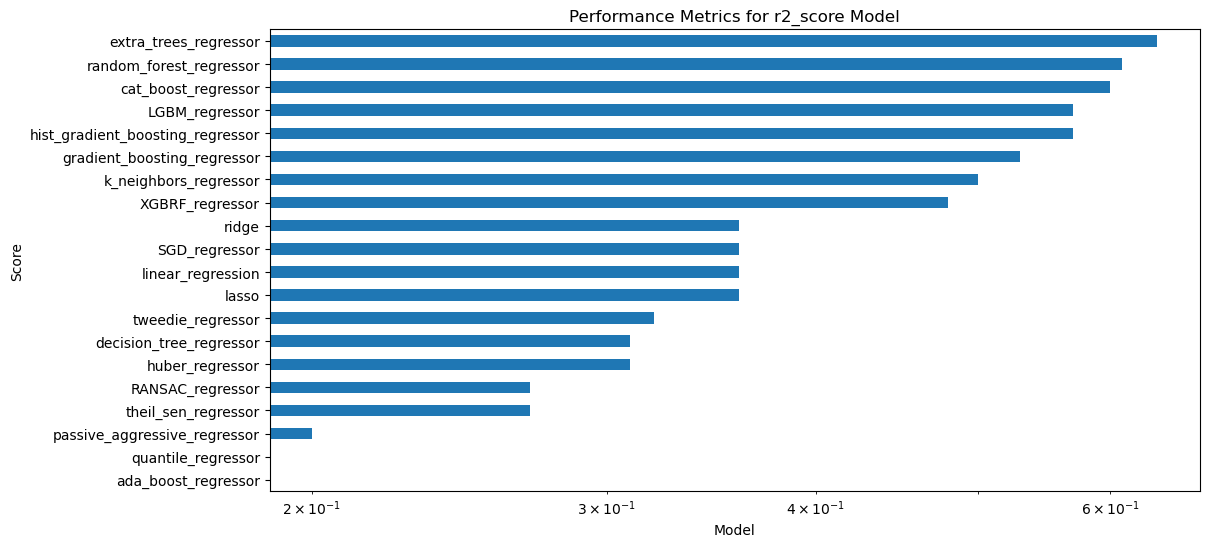

In [50]:
# Create a visualization for the r2_score
eval_report_df['R2_electricity'].sort_values(ascending = True).plot(
    kind = 'barh', figsize = (12,6))
plt.title('Performance Metrics for r2_score Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xscale('log')
plt.show()

### Part 2: 
Using streamlit library, build a simple web interface to do the predictions, give a screenshot of your web interface showing all the entries, the button and the predicted output.

In [51]:
# Install the required packages
#!pip install streamlit

In [52]:
# Import the required package
import streamlit as st

In [53]:
# Train a simple model (You can change this to other models from your dictionary)
model = RandomForestRegressor()
model.fit(X_train_preprocessed_electricity, y_train_preprocessed_electricity)

# Streamlit UI for user interaction
st.title("Electricity Price Prediction")

# Sidebar for user inputs
st.sidebar.header("Input Parameters")

# Dynamically create input fields for each feature in X_test
user_input = {}
for col in X.columns:
    if X[col].dtype == 'object':
        user_input[col] = st.sidebar.selectbox(f"Select {col}", X[col].unique())
    else:
        user_input[col] = st.sidebar.number_input(f"Enter {col}", min_value=float(X[col].min()), max_value=float(X[col].max()), value=float(X[col].mean()))

# Convert user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Preprocess the user input
user_input_preprocessed = preprocessor.transform(user_input_df)

# Predict based on user input
prediction = model.predict(user_input_preprocessed)

# Display prediction
st.subheader("Predicted Electricity Price")
st.write(prediction)

# Option to show data and model performance
if st.checkbox("Show Model Performance"):
    # Evaluate the model on test set
    y_pred_streamlit = model.predict(X_test_preprocessed_electricity)
    mae = mean_absolute_error(y_test_preprocessed_electricity, y_pred)
    mse = mean_squared_error(y_test_preprocessed_electricity, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_preprocessed_electricity, y_pred_streamlit)
    
    st.write(f"MAE: {mae}")
    st.write(f"MSE: {mse}")
    st.write(f"RMSE: {rmse}")
    st.write(f"R2 Score: {r2}")

2024-10-19 17:27:09.569 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.264 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-19 17:27:15.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.279 Thread 'MainThread': mi

2024-10-19 17:27:15.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-19 17:27:15.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar